# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###

  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  sum = [X1 +X2 for X1, X2 in zip(X1,X2)]
  state_neuron = [1 if x >= T else 0 for x in sum]
  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    state_neuron = []
    sum = [X1 +X2 for X1, X2 in zip(X1,X2)]
    state_neuron = [1 if x >= T else 0 for x in sum]
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


List out all the limitations of MCP - Neurons.


Weight and threshold are fixed.

It can only solve linearly separable data.

It fails in problem like XOR.

Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

if X1==X2:
output=0
else:
output=1

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (2312, 784)
Label vector shape: (2312,)


What does the shape of X represent?

X represent the pixel of image.

What does the shape of Y represent?

Y represent class label of image (0, 1)

### Viewing the Dataset.

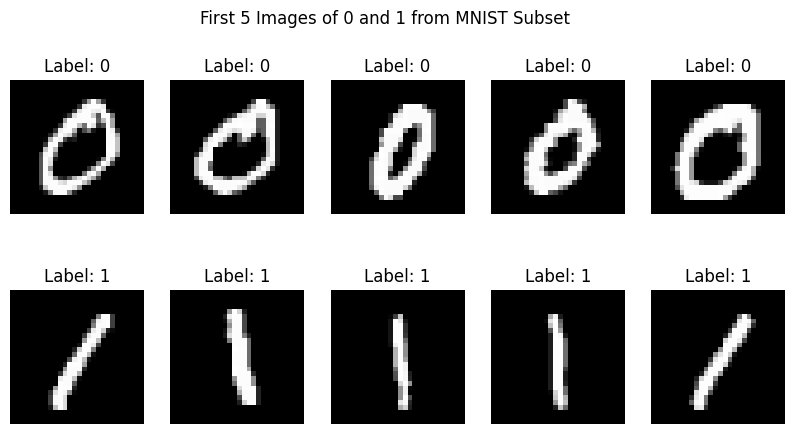

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

What does the weights array represent in this context ?

The weights array represents the learnable parameter in this context.

Why are we initializing the weights to zero ? What effect could this have on the training process?

We initialize the weights to zero to provide a neutral starting point for training, ensuring that the model does not start with any inherent biases. However, in multi-layer neural networks, this can lead to problems, such as symmetry, where all neurons in a layer learn the same features and fail to diversify. This can hinder the model's ability to learn effectively.

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            linear_output = np.dot(X[i], weights) + bias
            y_pred = np.where(linear_output >= 0, 1, 0)
            if y_pred == y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update

            else:
                correct_predictions += 1

        accuracy = correct_predictions / n_samples

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Accuracy: {accuracy}")

    return weights, bias, accuracy

What is the purpose of the output = np.dot(X[i], weights) + bias line?

The line output = np.dot(X[i], weights) + bias calculates the linear combination of input features and their corresponding weights, including the bias term.

When the prediction is incorrect, the weights and bias are adjusted using the Perceptron Learning Rule to improve future predictions.

Final accuracy is crucial as it reflects the model's performance on unseen data. Ideally, the accuracy should be close to 1.

## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 0, Accuracy: 0.4710207612456747
Epoch 10, Accuracy: 0.4710207612456747
Epoch 20, Accuracy: 0.4710207612456747
Epoch 30, Accuracy: 0.4710207612456747
Epoch 40, Accuracy: 0.4710207612456747
Epoch 50, Accuracy: 0.4710207612456747
Epoch 60, Accuracy: 0.4710207612456747
Epoch 70, Accuracy: 0.4710207612456747
Epoch 80, Accuracy: 0.4710207612456747
Epoch 90, Accuracy: 0.4710207612456747
The Final Accuracy is:  0.4710207612456747


## Step 5: Visualize Misclassified Images

Final Accuracy: 0.5290


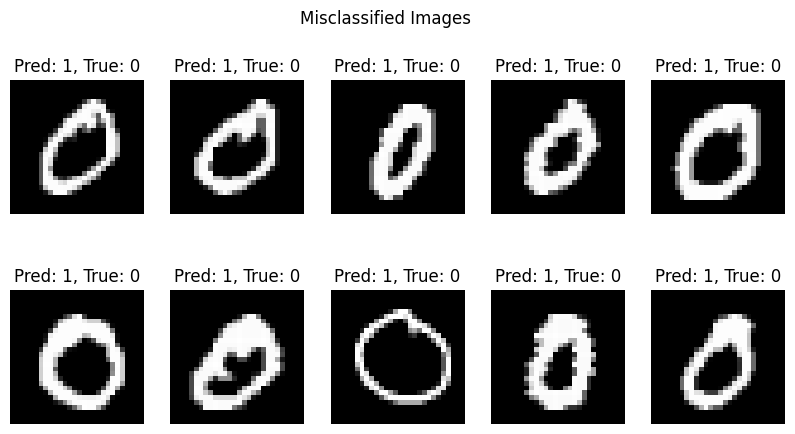

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

What does misclassified idx store, and how is it used in this code?

The variable misclassified_idx stores the indices of misclassified samples in the validation set.

If the output displays "All images were correctly classified!", it means misclassified_idx is empty, indicating that all predictions were correct.

For the non binary data the classification is completely wrong.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df1 = pd.read_csv("mnist_3_and_5.csv")

#Extract features and labels
X1 = df1.drop(columns=["label"]).values
y1= df1["label"].values

y1 = np.where(y1 == 5, 1, 0)


weights = np.zeros(X1.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
  """
  Train the perceptron using the Perceptron Learning Algorithm.

  Parameters:
  - X: Features (input data) as a numpy array of shape (n_samples, n_features)
  - y: Target labels (binary : 0 or 1)
  - weights: Initial weights as a numpy array of shape (n_features,)
  -bias: Initial bias value (scalar)
  - learning_rate: Learning rate
  - epochs: Number of iterations

  Returns
  -updated wights, bias, and accuracy
  """
  n_samples = X.shape[0]

  for epoch in range(epochs):
    correct_predictions = 0

    for i in range(n_samples):
      linear_output = np.dot(X[i], weights) + bias
      y_pred = 1 if linear_output >= 0 else 0


      if y_pred == y[i]:
        update = learning_rate * (y[i] - y_pred)
        weights += update * X[i]
        bias += update

      else:
        correct_predictions += 1

    accuracy = correct_predictions / n_samples
    if epoch % 10 == 0 or epoch == epochs - 1:
      print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.4f}")

  return weights, bias, accuracy

  #Train the preceptron
  weights, bias, accuracy = train_perceptron(X1, y1, weights, bias, learning_rate, epochs)

  #Evaluate the model using the new function
  print("The Final Accuracy is: ", accuracy)

  predictions = np.dot(X1, weights) + bias
  y_pred = np.where(predictions >= 0, 1, 0)

  #Calucate final accuracy
  final_accuracy = np.mean(y_pred == y1)
  print(f"Final Accuracy: {final_accuracy:.4f}")

  misclassified_idx = np.where(y_pred != y1)[0]

  if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
      ax.imshow(X[idx].reshape(28, 28), cmap="gray")
      # Format the title as "Predicted : 3, True: 5"
      ax.set_title(f"Predicted: {y_pred[idx]}, True: {y[idx]}")
      ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
  else:
    print("All images were correctly classified!")